In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Math Definition

Our NN (Neural Network) will have a simple two-layer architecture. Input layer $ a^{[0]} $ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $ a^{[1]} $ will have 10 units with ReLU activation, and finally our output layer $ a^{[2]} $ will have 10 units corresponding to the ten digit classes with softmax activation.

#### Forward Propagation

$$ Z^{[1]} = W^{[1]}X + b^{[1]} $$
$$ A^{[1]} = g_{ReLU}(Z^{[1]})$$
$$ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} $$
$$ A^{[2]} = g_{softmax}(Z^{[2]}) $$ 

#### Backward Propagation

$$ dZ^{[2]} = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T} $$
$$ dB^{[2]} = \frac{1}{m}\sum d Z^{[2]} $$
$$ dZ^{[1]} = W^{[2]T} d Z^{[2]} \times g^{[1]'}(z^{[1]})$$
$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$ dB^{[1]} = \frac{1}{m}\sum dZ^{[1]} $$

#### Parameter Updates

$$ W^{[2]} := W^{[2]} - \alpha dW^{[2]} $$
$$ b^{[2]} := b^{[2]} - \alpha db^{[2]} $$
$$ W^{[1]} := W^{[1]} - \alpha dW^{[1]} $$
$$ b^{[1]} := b^{[1]} - \alpha db^{[1]} $$

#### Vars and Shapes

Forward Prop
- $ A^{[0]} = X: $ 784 x m
- $ Z^{[1]} \sim A^{[1]}: $ 10 x m
- $ W^{[1]}: $ 10 x 784 (as $ W^{[1]}A^{[0]} \sim Z^{[1]} $)
- $ B^{[1]}: $ 10 x 1
- $ Z^{[2]} \sim A^{[2]}: $ 10 x m
- $ W^{[1]}: $ 10 x 10 (as $ W^{[2]}A^{[1]} \sim Z^{[2]} $)
- $ B^{[2]}: $ 10 x 1

Back Prop
- $ dZ^{[2]}: $ 10 x m ($ A^{[2]} $)
- $ dW^{[2]}: $ 10 x 10
- $ dB^{[2]}: $ 10 x 1
- $ dZ^{[1]}: $ 10 x m ($ A^{[1]} $)
- $ dW^{[1]}: $ 10 x 10
- $ dB^{[1]}: $ 10 x 1

### Neural Newtork
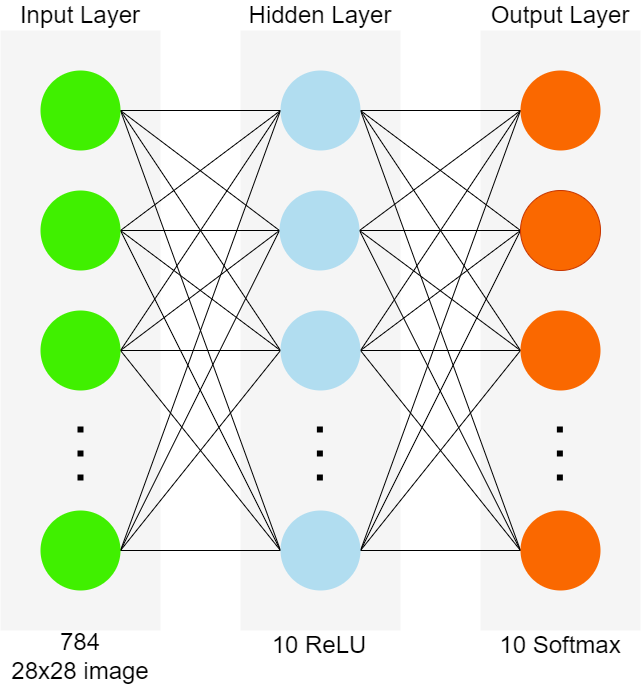

In [4]:
data = np.array(data)
# m is the number of rows, n is the number of columns howver it is technically +1 due to the label column
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# transposing data matrix for ease of use
data_dev = data[0:1000].T
# Easier access of Y component due to transpose
Y_dev = data_dev[0]
# X compoment begins from 1 due to the label column. Making use of n due to result of transposition
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# Same goes for the training matrix / algorithm
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    # preserves amount of columns but collapses the amount of rows (to 1 to create sum for each column). Divide each element by that sum.
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    # creates an array to the size of training exmaples
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    # flip as we want each column to be example instead of row (matching the previous transposition)
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f'Iteration: {i} ')
            print(f'Accuracy: {get_accuracy(get_predictions(A2), Y)}')
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.3)

Iteration: 0 
[2 6 3 ... 4 2 2] [6 0 1 ... 4 1 2]
Accuracy: 0.09848780487804878
Iteration: 10 
[4 5 3 ... 4 2 2] [6 0 1 ... 4 1 2]
Accuracy: 0.2941219512195122
Iteration: 20 
[6 5 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.5497317073170732
Iteration: 30 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.6564146341463415
Iteration: 40 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.7115853658536585
Iteration: 50 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.6589756097560976
Iteration: 60 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.747219512195122
Iteration: 70 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.77
Iteration: 80 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.7848048780487805
Iteration: 90 
[6 0 1 ... 4 1 2] [6 0 1 ... 4 1 2]
Accuracy: 0.7990975609756098


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print(f'Prediction: {prediction}')
    print(f'Label: {label}')
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [6]
Label: 6


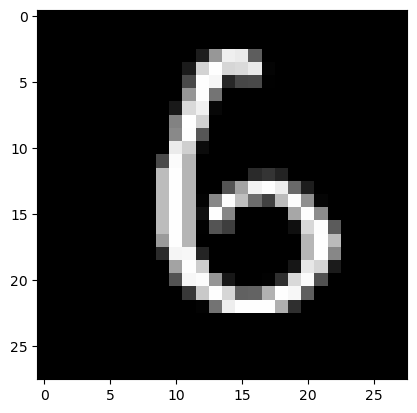

Prediction: [0]
Label: 0


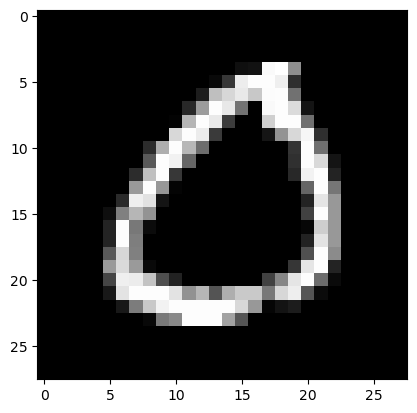

Prediction: [1]
Label: 1


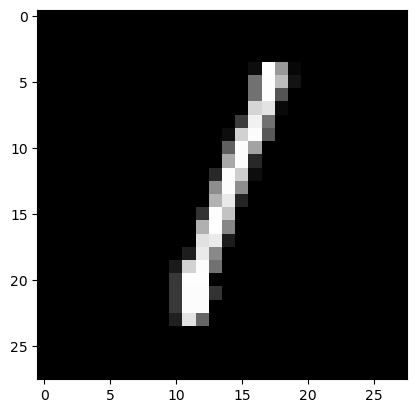

Prediction: [1]
Label: 1


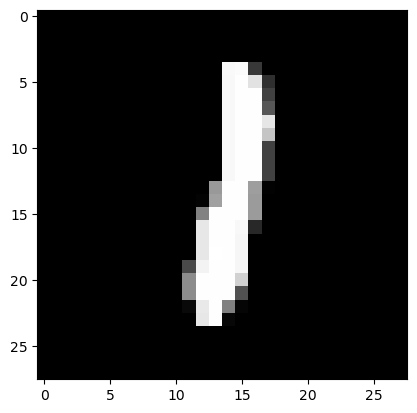

Prediction: [7]
Label: 7


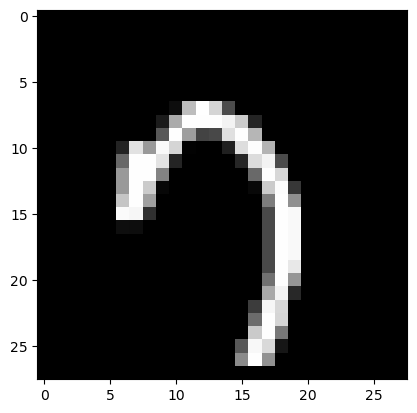

Prediction: [6]
Label: 6


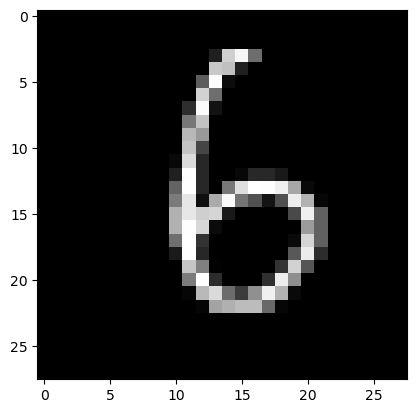

Prediction: [7]
Label: 7


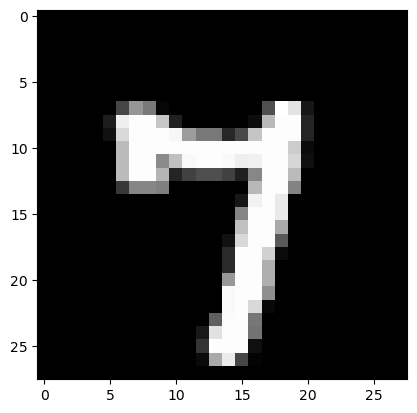

Prediction: [1]
Label: 1


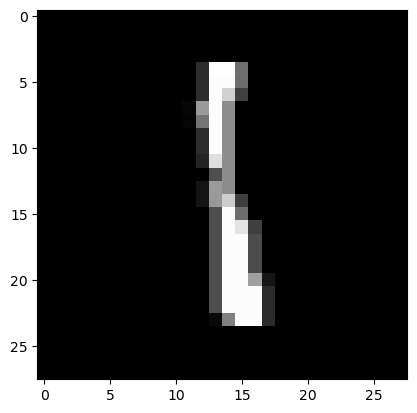

Prediction: [9]
Label: 9


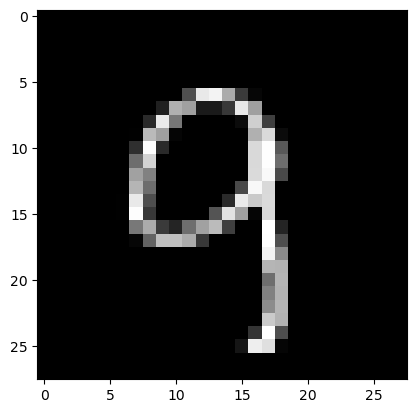

Prediction: [3]
Label: 3


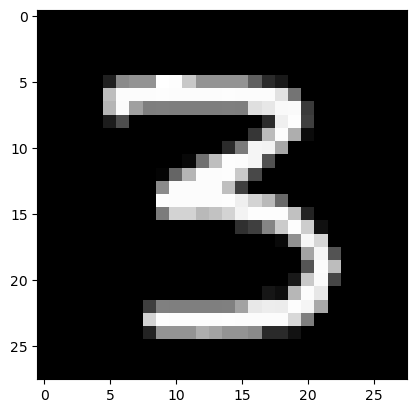

Prediction: [7]
Label: 7


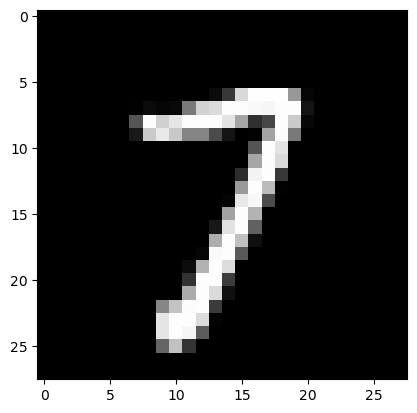

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)